<a href="https://colab.research.google.com/github/sallylpez/Desafio_Alura_Data_science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a080b6eaf01eb8ebc5dd987c6c40f91ad9aeb9f6cb277c72c4a22fb6137d4bcf
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


### Importación de datos



In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
ProfileReport(tienda)

In [ ]:
ProfileReport(tienda2)

In [ ]:
ProfileReport(tienda3)

In [ ]:
ProfileReport(tienda4)

In [ ]:
from http.client import PRECONDITION_FAILED
from urllib.request import urlopen
import csv

urls= [url,url2,url3,url4]

def leer_csv(url):
  datos = []
  with urlopen(url) as respuesta:
    lineas =respuesta.read().decode('utf-8').splitlines()
    lector = csv.DictReader(lineas)
    for linea in lector:
      datos.append(linea)
  return datos

total_facturacion = 0

for i, url in enumerate(urls):
  datos_tienda = leer_csv(url)
  facturacion_tienda = 0

  for venta in datos_tienda:
    precio = float(venta['Precio'])
    facturacion_tienda += precio

  total_facturacion += facturacion_tienda
  print(f'La facturación de la tienda {i+1} es {facturacion_tienda}')




La facturación de la tienda 1 es 1038375700.0
La facturación de la tienda 2 es 1116343500.0
La facturación de la tienda 3 es 1098019600.0
La facturación de la tienda 4 es 1038375700.0


In [ ]:
facturacion_tienda1 = tienda['Precio'].astype(float).sum()
facturacion_tienda2 = tienda2['Precio'].astype(float).sum()
facturacion_tienda3 = tienda3['Precio'].astype(float).sum()
facturacion_tienda4 = tienda4['Precio'].astype(float).sum()

print(f'La facturación de la tienda 1 es {facturacion_tienda1}')
print(f'La facturación de la tienda 2 es {facturacion_tienda2}')
print(f'La facturación de la tienda 3 es {facturacion_tienda3}')
print(f'La facturación de la tienda 4 es {facturacion_tienda4}')

facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4

print(f'La facturación total es {facturacion_total}')

La facturación de la tienda 1 es 1150880400.0
La facturación de la tienda 2 es 1116343500.0
La facturación de la tienda 3 es 1098019600.0
La facturación de la tienda 4 es 1038375700.0
La facturación total es 4403619200.0


In [ ]:
tienda_df={'Tienda':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}

analisis_facturacion = {
    nombre:df.groupby('Producto')['Precio'].sum()
    for nombre, df in tienda_df.items()
    }

for nombre, analisis in analisis_facturacion.items():
    print(f'Análisis de facturación en "{nombre}":')
    print(analisis)
    print()

    df = tienda_df[nombre]

    total_ventas = float(df['Precio'].sum())
    print(f'El total de ventas en "{nombre}" es {total_ventas}')
    print()



Análisis de facturación en "Tienda":
Producto
Ajedrez de madera                1430600.0
Armario                         29462300.0
Asistente virtual                8058000.0
Auriculares                      5043700.0
Auriculares con micrófono        4730800.0
Balón de baloncesto              2749800.0
Balón de voleibol                2112200.0
Batería                         37693900.0
Bicicleta                       27444600.0
Bloques de construcción          1865700.0
Cama box                        22094700.0
Cama king                       31176600.0
Carrito de control remoto        3761800.0
Celular ABXY                    32651000.0
Ciencia de datos con Python      2063600.0
Cubertería                       2402300.0
Cubo mágico 8x8                   696900.0
Cuerda para saltar                652800.0
Dashboards con Power BI          1455700.0
Dinosaurio Rex                    688900.0
Estufa                          29879500.0
Guitarra acústica               14074000.0
Guitarra

# 2. Ventas por categoría

In [ ]:
tienda_df={'Tienda':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}

total_ventas_por_categoria = {
    nombre:df.groupby('Categoría del Producto')['Precio'].sum()
    for nombre, df in tienda_df.items()
    }

for nombre, ventas_por_categoria in total_ventas_por_categoria.items():
    print(f'Ventas por categoría en "{nombre}":')
    print(ventas_por_categoria)
    print()

Ventas por categoría en "Tienda":
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categoría en "Tienda2":
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Ventas por categoría en "Tienda3":
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos              

# 3. Calificación promedio de la tienda


In [ ]:
tienda_df={'Tienda':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}


for nombre, df in tienda_df.items():


    calificacion_promedio = float(df['Calificación'].mean())
    print(f'La calificación promedio de "{nombre}" es {calificacion_promedio}')
    print()



La calificación promedio de "Tienda" es 3.976685036032217

La calificación promedio de "Tienda2" es 4.037303942348453

La calificación promedio de "Tienda3" es 4.048325561678677

La calificación promedio de "Tienda4" es 3.9957591178965224



# 4. Productos más y menos vendidos

In [ ]:
productos_mas_vendidos = {
    nombre:df.groupby('Producto')['Precio'].sum().idxmax()
    for nombre, df in tienda_df.items()
    }

for nombre, producto in productos_mas_vendidos.items():
    print(f'El producto más vendido en "{nombre}" es {producto}')
    print()

El producto más vendido en "Tienda" es TV LED UHD 4K

El producto más vendido en "Tienda2" es Iphone 15

El producto más vendido en "Tienda3" es Refrigerador

El producto más vendido en "Tienda4" es Iphone 15



In [ ]:
productos_menos_vendidos = {
    nombre:df.groupby('Producto')['Precio'].sum().idxmin()
    for nombre, df in tienda_df.items()
    }

for nombre, producto in productos_menos_vendidos.items():
    print(f'El producto menos vendido en "{nombre}" es {producto}')
    print()


El producto menos vendido en "Tienda" es Cuerda para saltar

El producto menos vendido en "Tienda2" es Cubo mágico 8x8

El producto menos vendido en "Tienda3" es Cubo mágico 8x8

El producto menos vendido en "Tienda4" es Cuerda para saltar



# 5. Envío promedio por tienda

In [ ]:
envio_promedio = {
    nombre:df['Costo de envío'].mean()
    for nombre, df in tienda_df.items()
    }

for nombre, envio in envio_promedio.items():
    print(f'El envío promedio en "{nombre}" es {envio}')
    print()

El envío promedio en "Tienda" es 26018.60958033065

El envío promedio en "Tienda2" es 25216.235693090293

El envío promedio en "Tienda3" es 24805.680373039424

El envío promedio en "Tienda4" es 23459.457167090754



Text(0.5, 1.0, 'Envío promedio por tienda')

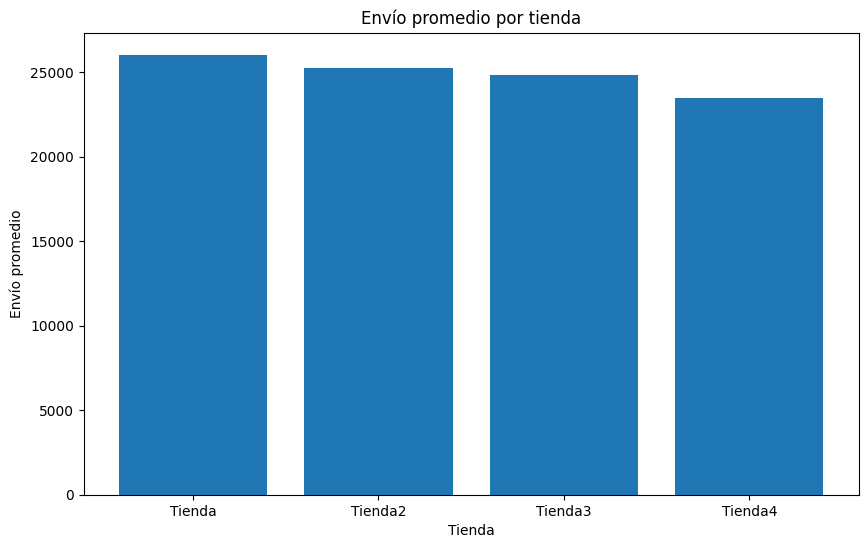

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(envio_promedio.keys(), envio_promedio.values())
plt.xlabel('Tienda')
plt.ylabel('Envío promedio')
plt.title('Envío promedio por tienda')